 1.Exploratory data analysis
2.Data cleaning
3.feature engineering
4.detecting otliers
5.encoding
6.machine learning

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# EDA

In [180]:
train.shape,test.shape

((1460, 81), (1459, 80))

In [181]:
numerical_features = train.select_dtypes(exclude = 'object')

In [182]:
num_corr = numerical_features.corr()

<Figure size 1080x720 with 0 Axes>

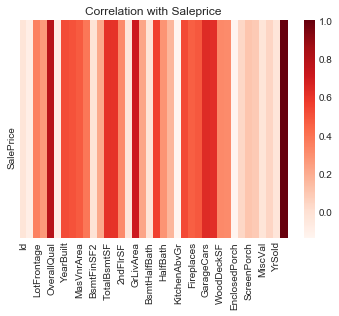

<Figure size 1080x720 with 0 Axes>

In [183]:
sns.heatmap(num_corr.sort_values(by = ['SalePrice'], ascending = False).head(1),cmap = 'Reds')
plt.title('Correlation with Saleprice')
plt.figure(figsize = (15,10))

In [184]:
num_corr['SalePrice'].sort_values(ascending = False).head(10).to_frame()

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


Showing the plot of strongly correlated features

Text(0.5,1,'Saleprice Vs OverallQual')

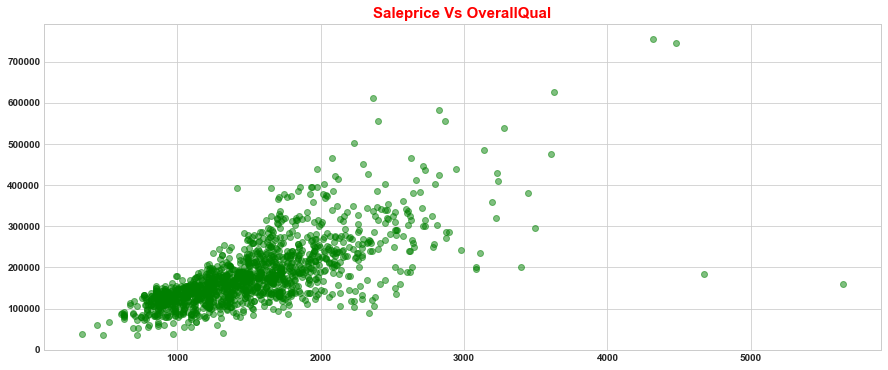

In [185]:
plt.figure(figsize= (15,6))
plt.scatter(train['GrLivArea'],train['SalePrice'],color = 'green', alpha = 0.5)
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')
plt.title('Saleprice Vs OverallQual', weight = 'bold', color = 'red', fontsize = 15)

Let's figure out how many missing values are there

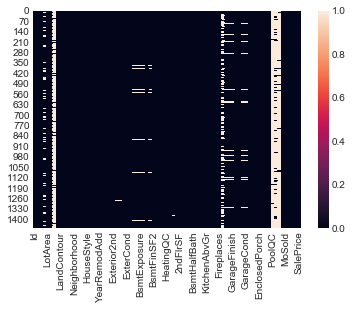

In [186]:
sns.heatmap(train.isnull())

In [187]:
import missingno as msno

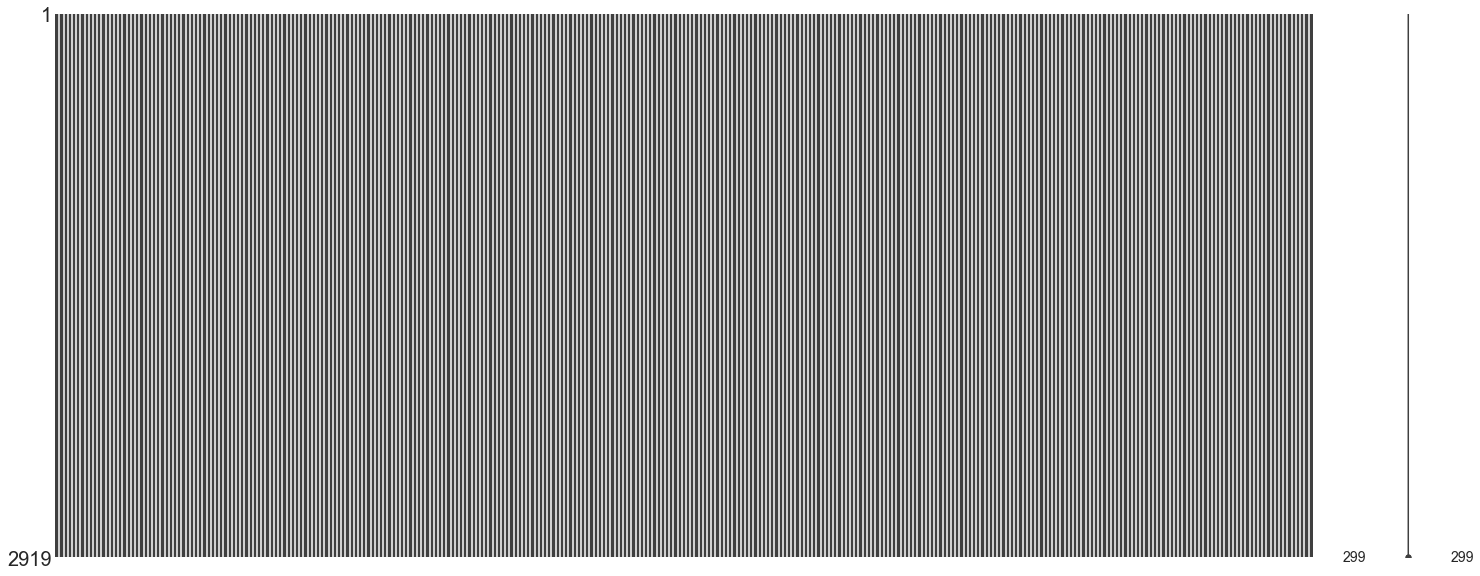

In [188]:
msno.matrix(all_data)

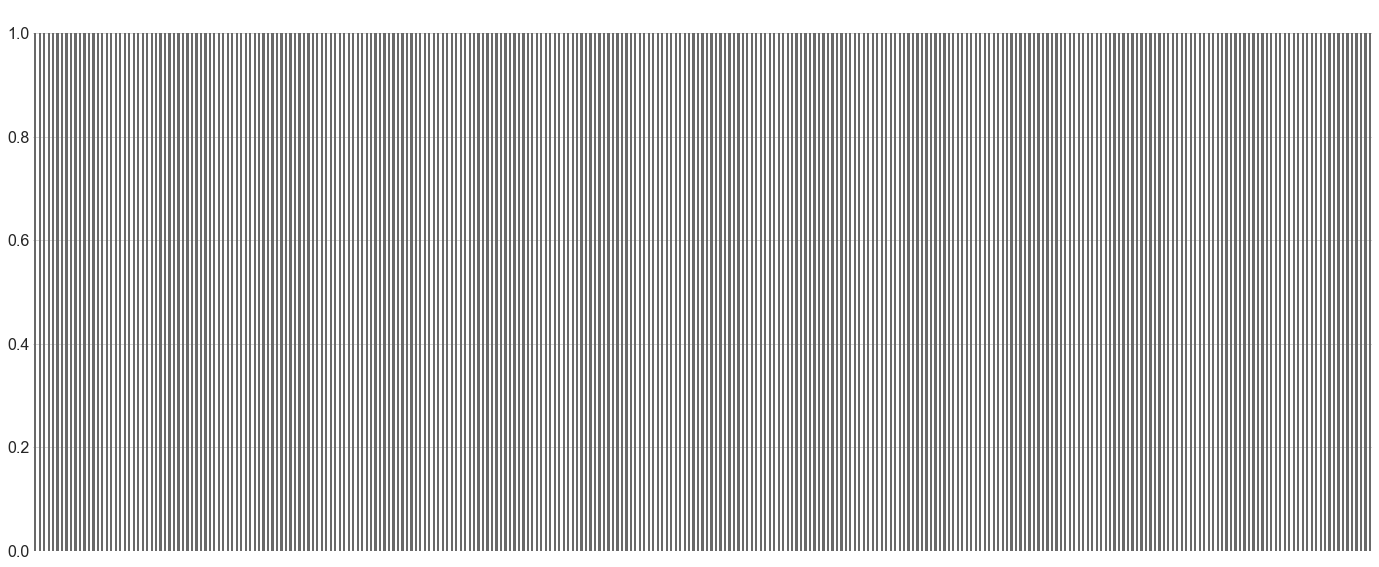

In [189]:
msno.bar(all_data)

Before data cleaning let's combine both train and test sets

# Data Cleaning

In [190]:
all_data = pd.concat((train.loc[:,:'SaleCondition'],test.loc[:,:'SaleCondition']))

In [191]:
all_data.drop(['Id'], axis=1, inplace=True)

In [192]:
all_data.dropna(thresh = len(all_data)*0.9, inplace = True, axis = 1)

In [193]:
all_na =all_na.drop(all_na[all_na == 0].index).sort_values(ascending = False)

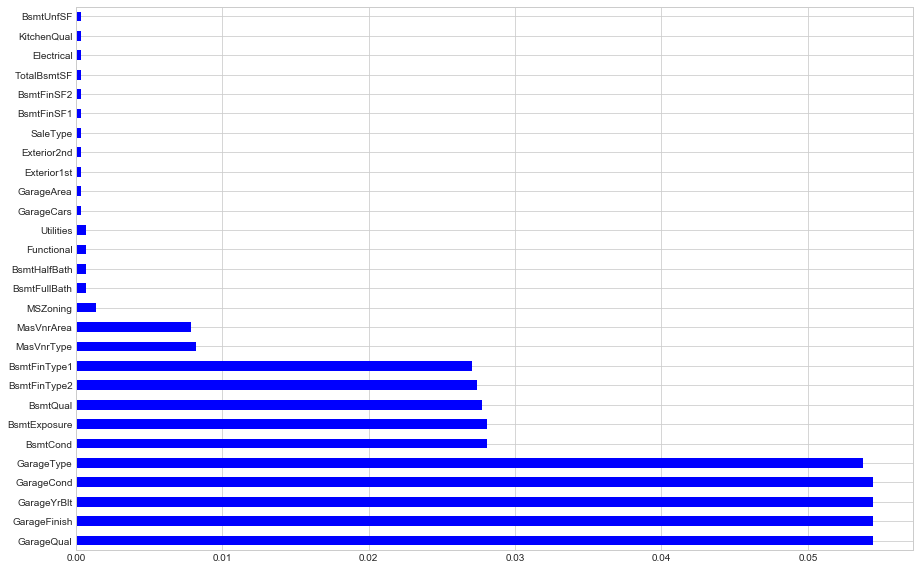

In [194]:
plt.figure(figsize= (15,10))
all_na.plot.barh(color = 'blue')

In [195]:
all_data_na = all_data[all_na.index]

In [196]:
all_data_na.shape

(2919, 28)

In [197]:
cat_na = all_data_na.select_dtypes(include = 'object')
num_na = all_data_na.select_dtypes(exclude = 'object')

In [198]:
num_na

,GarageYrBlt,MasVnrArea,BsmtFullBath,BsmtHalfBath,GarageCars,GarageArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,BsmtUnfSF
0,2003.0,196.0,1.0,0.0,2.0,548.0,706.0,0.0,856.0,150.0
1,1976.0,0.0,0.0,1.0,2.0,460.0,978.0,0.0,1262.0,284.0
2,2001.0,162.0,1.0,0.0,2.0,608.0,486.0,0.0,920.0,434.0
3,1998.0,0.0,1.0,0.0,3.0,642.0,216.0,0.0,756.0,540.0
4,2000.0,350.0,1.0,0.0,3.0,836.0,655.0,0.0,1145.0,490.0
5,1993.0,0.0,1.0,0.0,2.0,480.0,732.0,0.0,796.0,64.0
6,2004.0,186.0,1.0,0.0,2.0,636.0,1369.0,0.0,1686.0,317.0
7,1973.0,240.0,1.0,0.0,2.0,484.0,859.0,32.0,1107.0,216.0
8,1931.0,0.0,0.0,0.0,2.0,468.0,0.0,0.0,952.0,952.0
9,1939.0,0.0,1.0,0.0,1.0,205.0,851.0,0.0,991.0,140.0


In [199]:
all_data.GarageYrBlt=all_data.GarageYrBlt.fillna(1980)

In [200]:
num_na.drop(['GarageYrBlt'], axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [201]:
num_na.columns

Index(['MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars',
       'GarageArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'BsmtUnfSF'],
      dtype='object')

In [202]:
for nf in num_na.columns:
    all_data[nf] = all_data[nf].fillna(0)

In [203]:
small_cat_na.index

Index(['KitchenQual', 'SaleType', 'Exterior2nd', 'Exterior1st', 'Electrical',
       'Utilities', 'Functional', 'MSZoning'],
      dtype='object')

In [204]:
for sf in small_cat_na.index:
    all_data[sf] = all_data[sf].fillna(method = 'ffill')

In [205]:
cat_na1 = all_data.select_dtypes(include = 'object')

In [206]:
for cn in cat_na1.columns:
    all_data[cn] = all_data[cn].fillna('None')

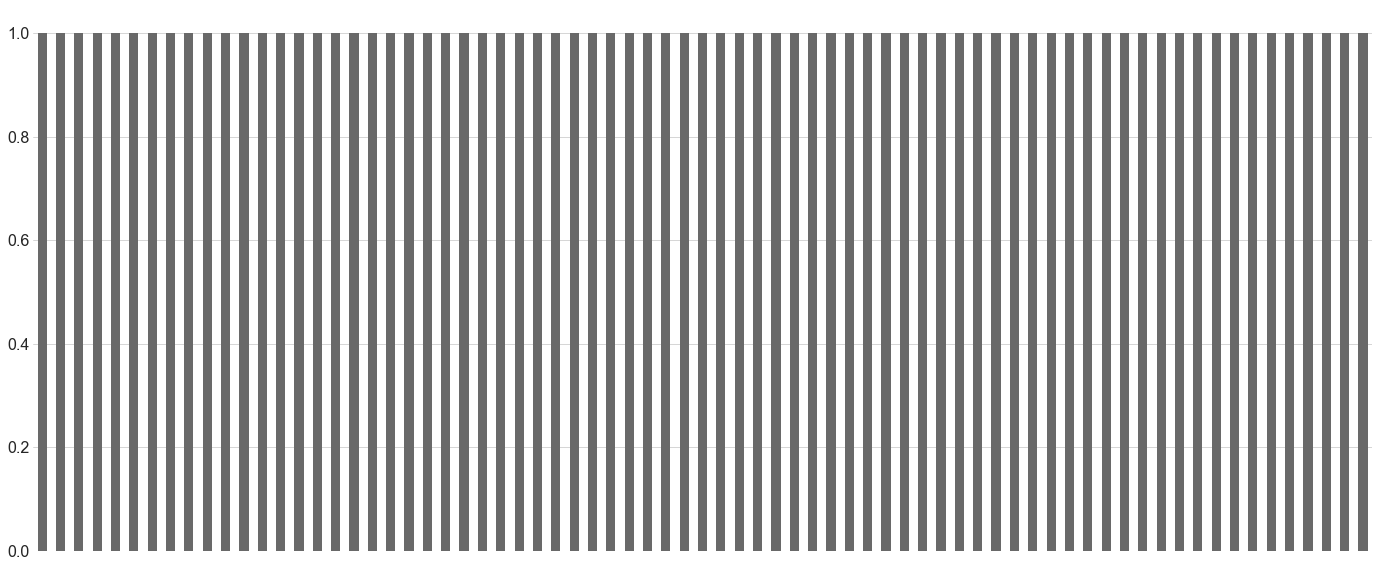

In [207]:
msno.bar(all_data)

# Feature Engineering 

In [208]:
all_data.head(3)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal


In [209]:
all_data['TotalArea'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF'] + all_data['GrLivArea'] + all_data['GarageArea']

In [210]:
all_data['Bathrooms'] = all_data['FullBath'] + all_data['HalfBath']*0.5

In [211]:
#all_data['Age'] = 2016 -all_data['YearBuilt']

# Encoding

In [212]:
all_data.select_dtypes(exclude = 'object').columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'TotalArea', 'Bathrooms'],
      dtype='object')

In [213]:
all_data['MoSold'] = all_data['MoSold'].astype(str)

onehotencoding

In [214]:
all_data= pd.get_dummies(all_data)

In [215]:
print("The shape of combinde data",all_data.shape)

The shape of combinde data (2919, 291)


Log transformation to handle skewness

In [216]:
from scipy.stats import skew

In [217]:
numeric_features = all_data.select_dtypes(exclude = 'object').columns

In [218]:
sk_f = all_data[numeric_features].apply(lambda x : skew(x.dropna()))

In [219]:
sk_f = sk_f[sk_f > 0.75]

In [220]:
sk_features = sk_f.index

In [221]:
all_data[sk_features] = np.log1p(all_data[sk_features])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'after trnasformation')

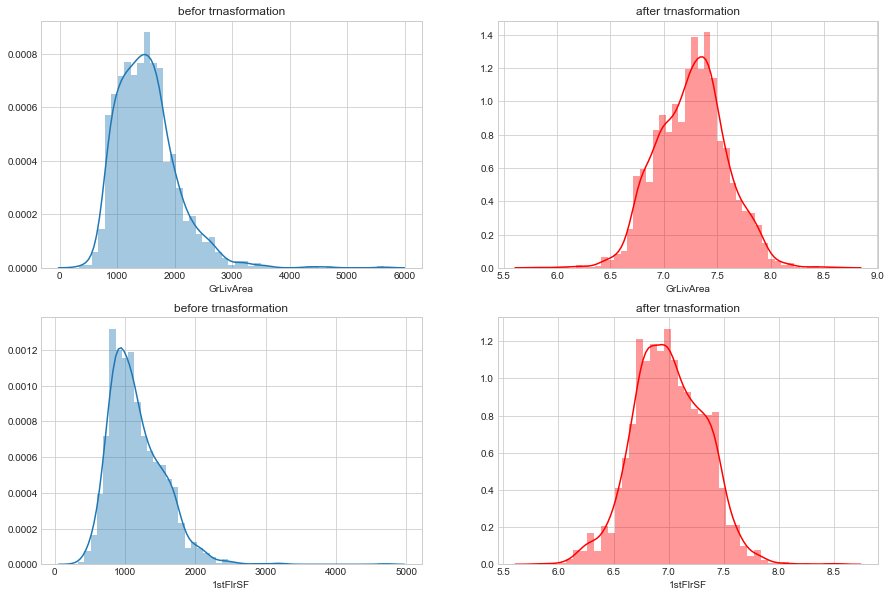

In [222]:
plt.figure(figsize = (15,10))
plt.subplot(221)
sns.distplot(train['GrLivArea'])
plt.title("befor trnasformation")

plt.subplot(222)
sns.distplot(all_data['GrLivArea'], color = 'Red')
plt.title("after trnasformation")

plt.subplot(223)
sns.distplot(train['1stFlrSF'])
plt.title("before trnasformation")

plt.subplot(224)
sns.distplot(all_data['1stFlrSF'], color = 'Red')
plt.title("after trnasformation")

Outlier Detection

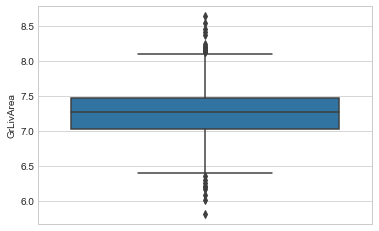

In [223]:
sns.boxplot(all_data['GrLivArea'],orient = 'v')

In [224]:
#it's skewed let's apply log transformation
train['SalePrice'] = np.log1p(train['SalePrice'])

Text(0.5,1,'after transformation')

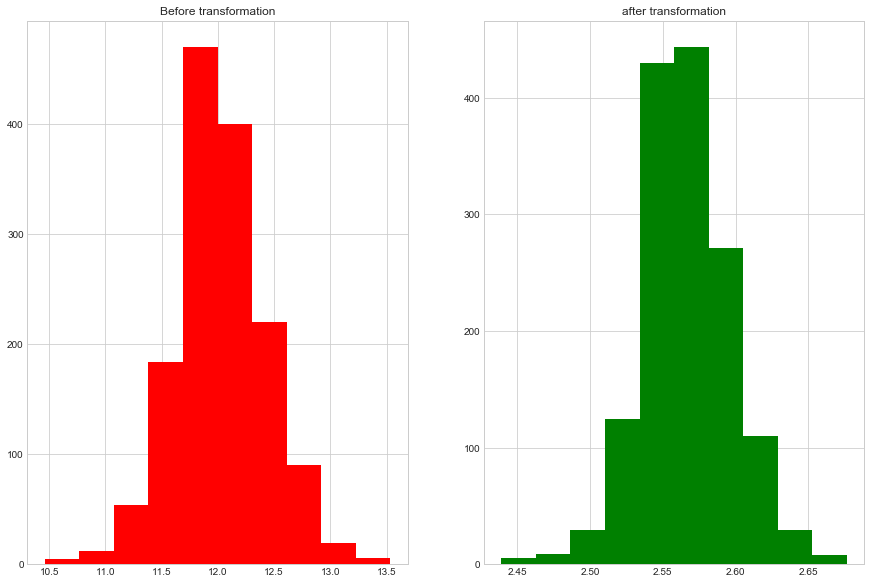

In [225]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,10))
plt.subplot(121)
plt.hist(train['SalePrice'],color = 'red')
plt.title("Before transformation")

plt.subplot(122)
plt.hist(np.log1p(train['SalePrice']),color = 'green')
plt.title("after transformation")

In [226]:
Train = all_data[:1460]
Test = all_data[1460:]

In [227]:
#pos = [1298,523, 297, 581, 1190, 1061, 635, 197,1328, 495, 583, 313, 335, 249, 706]
pos = [1298,523, 297]
#y.drop(y.index[pos], inplace=True)
Train.drop(Train.index[pos], inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [228]:
#pos = [1298,523, 297, 581, 1190, 1061, 635, 197,1328, 495, 583, 313, 335, 249, 706]
y = train['SalePrice']
pos = [1298,523, 297]
y.drop(y.index[pos], inplace=True)

In [229]:
X = test

# Model building 

In [230]:
from sklearn.model_selection import train_test_split

In [267]:
x_train,x_test,y_train,y_test = train_test_split(Train,y,test_size = 0.33,random_state = 45)

In [268]:
#scaling the input data for better results
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
#X = scaler.fit_transform(X)

In [234]:
from sklearn.metrics import mean_squared_error
def build_model(model,X_train,X_test,Y_train,Y_test):
    model = model.fit(X_train,Y_train)
    y_predict_train = model.predict(X_train)
    y_predict_test = model.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(Y_test,y_predict_test))
    rmse_train = np.sqrt(mean_squared_error(Y_train,y_predict_train))
    print("Model RMSE on training set : {} \nModel RMSE on test set : {}".format(rmse_train,rmse_test))

In [284]:
#linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Train,y)
MSEs = cross_val_score(lr,Train,y,scoring = 'neg_mean_squared_error', cv = 5)
np.sqrt(-np.mean(MSEs))

0.12344725777654866

# 0.123

In [ ]:
#Our goal is to reduce the RMSE. let's try Lasso, Ridge, ElasticNet

In [269]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [270]:
parameters ={'alpha': [i for i in range(0,101)]}
rd = Ridge()

In [271]:
rd = GridSearchCV(rd,param_grid = parameters, scoring = 'neg_mean_squared_error',cv = 5)

In [272]:
rd.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [273]:
print(rd.best_params_)
print(math.sqrt(-rd.best_score_))

{'alpha': 4}
0.11365346762151228


# 0.113

In [300]:
rd = Ridge(alpha = 4)

In [306]:
rd = rd.fit(Train,y)

In [341]:
preds = np.expm1(rf.predict(Test))

In [342]:
preds

array([127888.97010911, 155579.58138659, 180198.18039843, ...,
       159585.34174261, 112810.37231916, 225190.96108208])

In [343]:
sln = pd.DataFrame({'Id':test.Id,'SalePrice':preds})

In [344]:
sln.to_csv("housing_price_pred_Jaikiran2.csv", index = False)

In [311]:
from sklearn.ensemble import GradientBoostingRegressor

In [312]:
gb = GradientBoostingRegressor()

In [314]:
params = {'learning_rate':[0.01,0.1,0.5,0.8,1,2,3,5,8],
         'n_estimators':[50,100,200,300],
         }

In [315]:
gb = GridSearchCV(gb, param_grid = params ,cv = 5)

In [316]:
gb.fit(Train,y)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:282: RuntimeWarning: overflow encountered in square
  np.sum(sample_weight * ((y - pred.ravel()) ** 2.0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:538: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:282: RuntimeWarning: overflow encountered in square
  np.sum(sample_weight * ((y - pred.ravel()) ** 2.0)))
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:538: RuntimeWarning: overflow encoun

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.01, 0.1, 0.5, 0.8, 1, 2, 3, 5, 8], 'n_estimators': [50, 100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [317]:
gb.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [319]:
gb = GradientBoostingRegressor(learning_rate= 0.1,n_estimators=200)

In [320]:
gb.fit(Train,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [325]:
from sklearn.ensemble import RandomForestRegressor

In [328]:
rf = RandomForestRegressor()
parameters = {'n_estimators':[50,100,200,300,500,800],
              'max_depth':[3,5,10,15,20],
             }
rf = GridSearchCV(rf,param_grid =parameters ,cv = 5)

In [329]:
rf.fit(Train,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 200, 300, 500, 800], 'max_depth': [3, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [331]:
y_predict = rf.predict(Train)
np.sqrt(mean_squared_error(y,y_predict))

0.0483998407934406

In [332]:
rf.best_params_

{'max_depth': 15, 'n_estimators': 800}

In [339]:
rf = RandomForestRegressor(n_estimators = 800,max_depth=15)

In [340]:
rf.fit(Train,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)